## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change your present working directory

In [0]:
import os
os.chdir('/content/drive/My Drive/Residency9/Lab Internal')

### Load your data file

In [0]:
import pandas as pd
data = pd.read_csv('daily-minimum-temperatures-in-me.csv')

In [4]:
data.head()

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


#### Plot data

#### Descibe your dataframe

In [5]:
data.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Check for null values

In [0]:
if data.isnull() is True:
  print('There is null data in the dataset.')

if data.isna() is True:
  print('There are NANs present in the dataset.')

#### Drop null values

In [0]:
# there are no null values present in the dataset.

#### Get the representation of the distribution of data in the form of histogram

In [0]:
import matplotlib.pyplot as plt

(array([ 53., 181., 564., 862., 830., 670., 347., 102.,  32.,   9.]),
 array([ 0.  ,  2.63,  5.26,  7.89, 10.52, 13.15, 15.78, 18.41, 21.04,
        23.67, 26.3 ]),
 <a list of 10 Patch objects>)

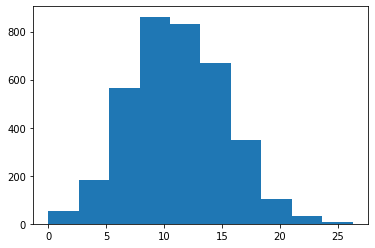

In [9]:
plt.hist(data.Temperature)

#### Check the maximum and minimum values

In [10]:
print('Max: ',max(data.Temperature),'   Min: ',min(data.Temperature))

Max:  26.3    Min:  0.0


### Normalize the data

In [0]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [0]:
scalar = MinMaxScaler()
data_std = scalar.fit_transform(np.array(data['Temperature']).reshape(-1, 1))
data['Temp_Std'] = data_std

In [13]:
data.head()

,Date,Temperature,Temp_Std
0,1981-01-01,20.7,0.787072
1,1981-01-02,17.9,0.680608
2,1981-01-03,18.8,0.714829
3,1981-01-04,14.6,0.555133
4,1981-01-05,15.8,0.600760


#### Check the maximum and minimum values of scaled data

In [14]:
print('Max: ',max(data.Temperature),'   Max_std: ',max(data.Temp_Std))
print('Min: ',min(data.Temperature),'   Min_std: ',min(data.Temp_Std))

Max:  26.3    Max_std:  1.0
Min:  0.0    Min_std:  0.0


#### Look into some of the scaled values

In [15]:
data[0:5]

,Date,Temperature,Temp_Std
0,1981-01-01,20.7,0.787072
1,1981-01-02,17.9,0.680608
2,1981-01-03,18.8,0.714829
3,1981-01-04,14.6,0.555133
4,1981-01-05,15.8,0.600760


### Split data into Training and Testing

In [0]:
data.drop(columns = 'Temperature', inplace = True)

In [17]:
train_data = data[0:2550]
train_data.tail()

,Date,Temp_Std
2545,1987-12-22,0.425856
2546,1987-12-23,0.433460
2547,1987-12-24,0.425856
2548,1987-12-25,0.460076
2549,1987-12-26,0.482890


In [18]:
test_data = data[2550:]
test_data.head()

,Date,Temp_Std
2550,1987-12-27,0.615970
2551,1987-12-28,0.539924
2552,1987-12-29,0.543726
2553,1987-12-30,0.505703
2554,1987-12-31,0.634981


#### Print train and test size

In [19]:
print('Actua Data: ', data.shape)
print('Train Data: ', train_data.shape)
print('Test Data: ', test_data.shape)

Actua Data:  (3650, 2)
Train Data:  (2550, 2)
Test Data:  (1100, 2)


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
def seq_dataset(T_data):
  T_data['Next_Temp'] = T_data.shift(periods=-1)['Temp_Std']
  T_x = T_data['Temp_Std']
  T_y = T_data['Next_Temp']
  return T_x, T_y 

#### Use function to get training and test set

In [21]:
X_train, y_train = seq_dataset(train_data)
X_test, y_test = seq_dataset(test_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
y_train.iloc[-1] = X_test.iloc[0]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [23]:
#3649 index

SyntaxError: ignored

In [24]:
X_test.drop(inplace=True, index = 3649)
y_test.dropna(inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3917: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [0]:
X_train = np.reshape(np.array(X_train), (X_train.shape[0], 1, 1))
X_test = np.reshape(np.array(X_test), (X_test.shape[0], 1, 1))

In [26]:
y_test

2550    0.539924
2551    0.543726
2552    0.505703
2553    0.634981
2554    0.581749
          ...   
3644    0.532319
3645    0.517110
3646    0.513308
3647    0.596958
3648    0.494297
Name: Next_Temp, Length: 1099, dtype: float64

In [27]:
X_test.shape

(1099, 1, 1)

## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [28]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [29]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(1, 1)))
model.output
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy','mse'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Summarize your model

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [31]:

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2550 samples, validate on 1099 samples
Epoch 1/10
2550/2550 [==============================] - 1s 309us/sample - loss: 0.0274 - acc: 7.8431e-04 - mean_squared_error: 0.0274 - val_loss: 0.0235 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.0235
Epoch 2/10
2550/2550 [==============================] - 0s 125us/sample - loss: 0.0239 - acc: 7.8431e-04 - mean_squared_error: 0.0239 - val_loss: 0.0214 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.0214
Epoch 3/10
2550/2550 [==============================] - 0s 112us/sample - loss: 0.0210 - acc: 7.8431e-04 - mean_squared_error: 0.0210 - val_loss: 0.0182 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.0182
Epoch 4/10
2550/2550 [==============================] - 0s 115us/sample - loss: 0.0175 - acc: 0.0012 - mean_squared_error: 0.0175 - val_loss: 0.0144 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.0144
Epoch 5/10
2550/2550 [========

## Make Predictions and Evaluate your model

In [0]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [0]:
import sklearn.metrics as eva

In [43]:
eva.mean_squared_error(y_pred=y_test_pred, y_true=y_test)

0.008741927959851388

In [44]:
eva.mean_squared_error(y_pred=y_train_pred, y_true=y_train)

0.01011318357864578

## Plot the results

In [33]:
X_train.shape

(2550, 1, 1)

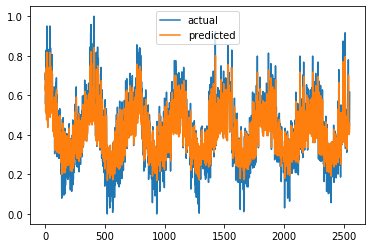

In [34]:
import matplotlib.pyplot as plt
# plotting the line 1 points 
plt.plot(range(0,2550), y_train, label = "actual")
# plotting the line 2 points 
plt.plot(range(0,2550), y_train_pred, label = "predicted")
plt.legend()
plt.show()

In [35]:
X_test.shape

(1099, 1, 1)

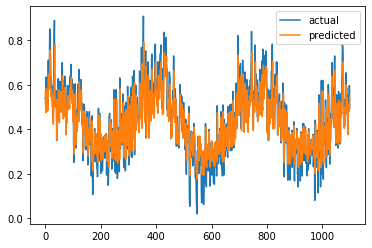

In [36]:
import matplotlib.pyplot as plt
# plotting the line 1 points 
plt.plot(range(0,1099), y_test, label = "actual")
# plotting the line 2 points 
plt.plot(range(0,1099), y_test_pred, label = "predicted")
plt.legend()
plt.show()